# 特征工程


## 1. 特征工程的概念

**概念**：特征工程是使用专业背景知识和技巧处理数据，使得特征能在机器学习算法上发挥更好的作用的过程。过程包含了数据清洗, 特征提取, 特征构建、特征选择等模块。

    - 数据清洗：
    - 特征提取：
    - 特征构建：
    - 特征选择：

**目的**：特征工程的目的是筛选出更好的特征，获取更好的训练数据。因为好的特征具有更强的灵活性，可以用简单的模型做训练，更可以得到优秀的结果。

- 第一，你的数据可能是假(异常值);
- 第二，你的数据太脏了(各种噪声);第三，你的数据可能不够，或者数据量不平衡(数据采样)；
- 第三，清洗完数据能直接用吗？显然不能！输入模型的数据要和模型输出有关系，没关系的那是噪声！(特征提取或处理)；第四，特征之间属于亲戚关系，你们是一家,不能反映问题！(特征选择)。

**重要性**： 对于浅度机器学习算法而言，特征工程的重要性超过了模型的重要性。

在sklearn中有两个模块是和特征相关的：

- Dimensionlity reduction:数据降维的方法；
- preprocessing:包含数据预处理的所有方法，数据标准化，

###  1.1 数据预处理

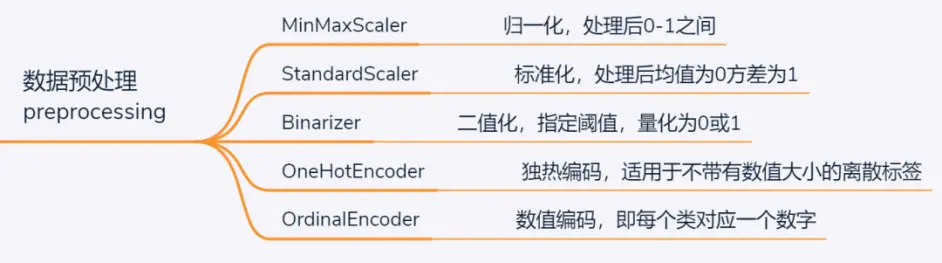

#### 1.1.1 数据无量纲化

不同量纲（计量单位）的数据对数据会造成不同的影响，比如身高体重两个因素对于人健康的要素的重要度差不多，但是因为身高范围一般为1-2米，而体重为几十斤到几百斤，因为量纲的不同会导致两种要素对模型的因素发生变化。

**无量纲化**：将不同量纲的的特征映射到同一个数据空间中。

具体的方法有：
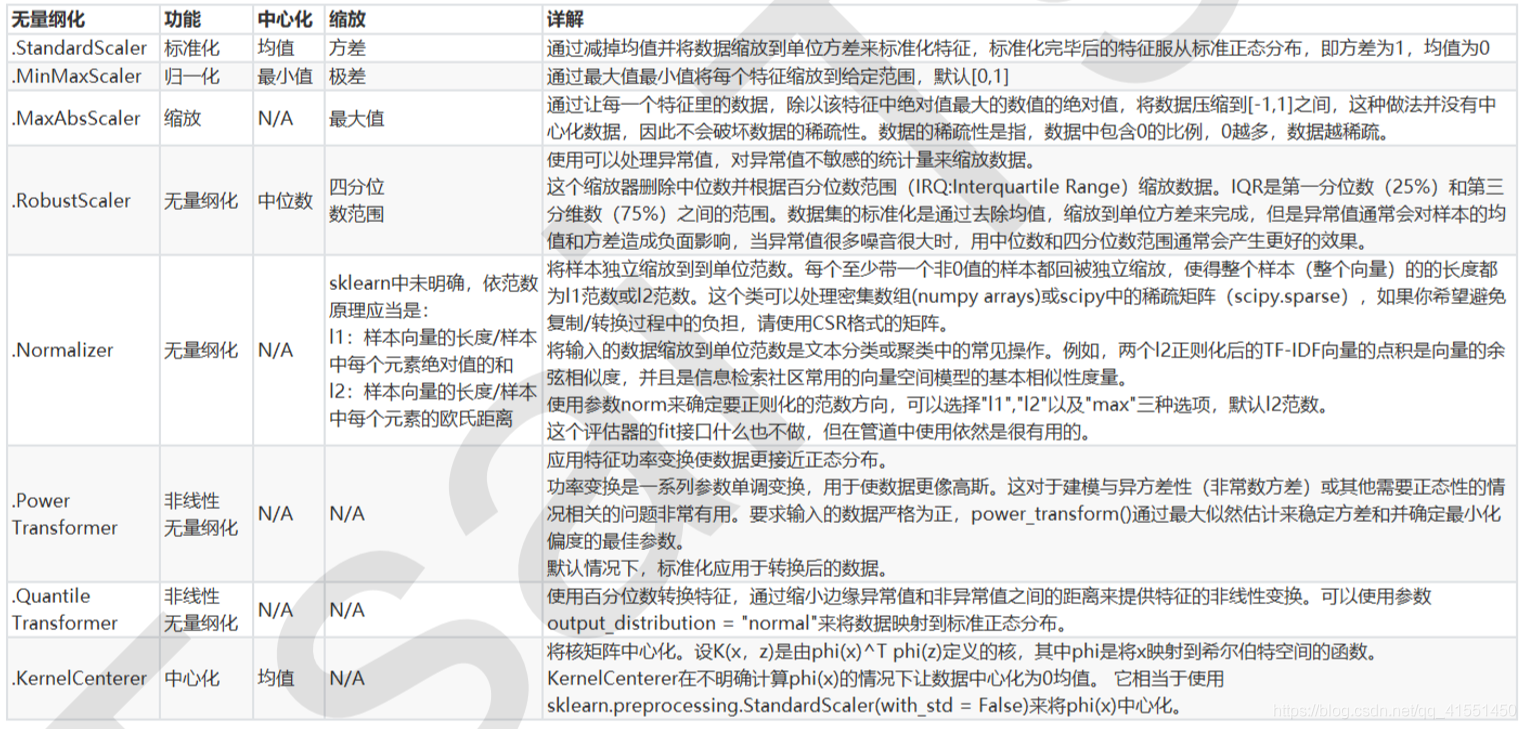

图中的方法我们全部都可以实现，但是sklearn库已经帮助我们实现了

#### sklearn.preprocessing.MinMaxScaler

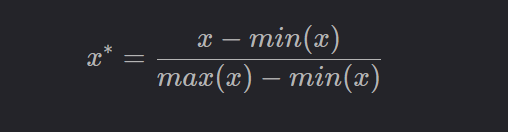

```
    sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
```
**输入参数**

 - feature_range：为元组类型，范围某认为:[0，1]，也可以取其他范围值。

- copy：为拷贝属性，默认为True,表示对原数据组拷贝操作，这样变换后元数组不变，False表 示变换操作后，原数组也跟随变化，相当于c++中的引用或指针。


In [2]:
# 例：minmaxscaler函数

#导入库
from sklearn import preprocessing
import numpy as np

#构造数据
x = np.array([[1.,-1.,2.],
 [2.,0.,0.],
 [0.,1.,-1.]])

#设定minmaxscaler对象
min_max_scaler = preprocessing.MinMaxScaler()#默认为范围0~1，拷贝操作
#min_max_scaler = preprocessing.MinMaxScaler(feature_range = (1,3),copy = False)#范围改为1~3，对原数组操作
#对数据进行标准化
x_minmax = min_max_scaler.fit_transform(x)
print('x_minmax = ',x_minmax)
print('x = ',x)

#新的测试数据进来，同样的转换
x_test = np.array([[-3,-1,4.],
 [0,-1,10]])
x_test_maxabs = min_max_scaler.fit_transform(x_test)
print('x_test_maxabs = ',x_test_maxabs)


x_minmax =  [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
x =  [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
x_test_maxabs =  [[0. 0. 0.]
 [1. 0. 1.]]


#### 1.1.2 标准化

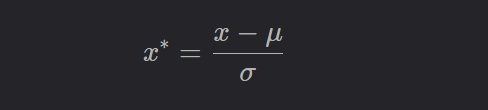

```
      sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)[source]
(1) fit():
		1.功能：
			计算均值和标准差，用于以后的缩放。
		2.参数：
			X: 二维数组，形如(样本的数量，特征的数量)
				训练集
				
	(2) fit_transform():
		1.功能：
			先计算均值、标准差，再标准化
		2.参数:
			X: 二维数组
		3.代码和学习中遇到的问题：
```

In [4]:
from sklearn.preprocessing import StandardScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
 
    
print("转换前数据{}".format(data))
scaler = StandardScaler()                           #实例化
scaler.fit(data)                                    #fit，本质是生成均值和方差

 
print("均值{}".format(scaler.mean_))                                        #查看均值的属性mean_
print("方差{}".format(scaler.var_))                                         #查看方差的属性var_
 
x_std = scaler.transform(data)                      #通过接口导出结果
 
x_std.mean()                                        #导出的结果是一个数组，用mean()查看均值
x_std.std()                                         #用std()查看方差
 
X=scaler.fit_transform(data)                          #使用fit_transform(data)一步达成结果
print("标准化后的数据{}".format(X)) 

转换前数据[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
均值[-0.125  9.   ]
方差[ 0.546875 35.      ]
标准化后的数据[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]
逆标准化后的数据[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


### 数据缺失值处理

机器学习和数据挖掘中所使用的数据，永远不可能是完美的。很多特征，对于分析和建模来说意义非凡，但对于实际收集数据的人却不是如此，因此数据挖掘之中，常常会有重要的字段缺失值很多，但又不能舍弃字段的情况。因此，数据预处理中非常重要的一项就是处理缺失值。

除了sklearn库提供缺失值处理外，numpy和pandas 也提供了对应的函数。这里我们学习sklearn中的“sklearn.imput.SimpleImputer”'

```sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, verbose=0, copy=True)

```
**重要参数**：

- missing_values	告诉SimpleImputer，数据中的缺失值长什么样，默认空值np.nan

- strategy	我们填补缺失值的策略，默认均值。 输入“mean”使用均值填补（仅对数值型特征可用） 输入“median"用中值填补（仅对数值型特征可用） 输入"most_frequent”用众数填补（对数值型和字符型特征都可用） 输入“constant"表示请参考参数“fill_value"中的值（对数值型和字符型特征都可用）

- fill_value	当参数startegy为”constant"的时候可用，可输入字符串或数字表示要填充的值，常用0

- copy	默认为True，将创建特征矩阵的副本，反之则会将缺失值填补到原本的特征矩阵中去。

In [14]:
#例  sklearn缺失值处理

import numpy as np
from sklearn.impute import SimpleImputer

# 创建带有缺失值的数据
x=[[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]

#创建填充器对象
imp=SimpleImputer(missing_values=np.nan,strategy="mean")

y=imp.fit_transform(x)
print(x)
print(y)

[[nan, 2, 3], [4, nan, 6], [10, nan, 9]]
[[ 7.  2.  3.]
 [ 4.  2.  6.]
 [10.  2.  9.]]


### 处理分类型特征：编码和独热编码

在数据集中特特征除了数字还有文本特征，但是对于机器学习模型而言，只能处理数字类型，因此需要我们在处理文本数据的时候，能将非数字型的数据编码为数字。

#### preprocessing.LabelEncoder:标签专用，将分类标签转换为数字

LabelEncoder的作用是将非数值标签设定为一个0-（n_class-1）的值。

包括三个方法：
   - fit():根据数据得到参数
   - transform:对数据进行实际的转换
   - fit_tranform:两个函数的联合调用；
   - inverse_transform:对数字编码的类别进行你转换
   - SimpleInputer.classes:返回实际的编码值；
  

####  preprocessing.OrdinalEncoder:特征专用，能将分类特征转为分类数值

用法同LabelEncoder, 只不过函数设定的应用场景不同。

#### preprocessing.OneHotEncoder:独热编码，创建哑变量。

OneHotEncoder 可用于将分类特征的每个元素转化为一个可直接计算的数值，能够让产生的数据的距离更加合理。

```OneHotEncoder(categorical_features=’all’,  dtype=<class ‘numpy.float64’>,  sparse=True,  handle_unknown=’error’)

```

**重要参数**
- 这个参数指定了对哪些特征进行编码，默认对所有类别都进行编码。也可以自己指定选择哪些特征，通过索引或者 bool 值来指定;

In [17]:
#例 标签样本的设定

from sklearn import preprocessing
 
le = preprocessing.LabelEncoder()
#输入数据是一个分类的类别
le.fit(["Japan", "china", "Japan", "Korea","china"])

print('标签个数:%s' % le.classes_)
print('标签值标准化:%s' % le.transform(["Japan", "china", "Japan", "Korea","china"]))
print('标准化标签值反转:%s' % le.inverse_transform([0, 2 ,0 ,1 ,2]))



标签个数:['Japan' 'Korea' 'china']
标签值标准化:[0 2 0 1 2]
标准化标签值反转:['Japan' 'china' 'Japan' 'Korea' 'china']


In [19]:
# 例  OrdinalEncoder

import numpy as np
from sklearn.preprocessing import OrdinalEncoder
 
x = [['Male',1],['Female',3],['Female',2]]

enc = OrdinalEncoder()

x_transform = enc.fit_transform(x)
print('OrdinalEncoder的原始输入：')
print(x)
print('OrdinalEncoder的输出：')
print(x_transform)



OrdinalEncoder的原始输入：
[['Male', 1], ['Female', 3], ['Female', 2]]
OrdinalEncoder的输出：
[[1. 0.]
 [0. 2.]
 [0. 1.]]


In [31]:
# 例： 以列为特征编码

encoder = preprocessing.OneHotEncoder()
encoder.fit([
    [0, 2, 1, 12],
    [1, 3, 5, 3],
    [2, 3, 2, 12],
    [1, 2, 4, 3]
])
encoded_vector = encoder.transform([[2, 3, 5, 3]]).toarray()
print("\n Encoded vector =", encoded_vector)



 Encoded vector = [[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]


### 连续数据离散化

有些时候我们需要把连续的数据变为离散的数据，比如在age中输入的年龄的数值，但是我们在模型中，处理数据时只需要判断年龄时成年人还是儿童。这种情况我们需要将年龄映射到离散值空间中来。

#### preprocessing.Binarizer

Binarizer能够将连续型的数据分成等宽的两个空间。


#### precessing.KBinsDiscretizer

KBinsDiscretizer 使用k个等宽的bins把特征离散化

In [38]:
#例 KBinsDiscretizer

X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])

est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)
print(est.transform(X))

[[0. 1. 1.]
 [1. 1. 1.]
 [2. 0. 0.]]


### 数据降维

- **数据维度**：样本数据中样本特征的个数；

- **引入数据降维的原因**： 机器学习模型拟合的输入数据往往是多维数据，这个维度可能会非常庞大。比如统计一篇文章中的单词频率，就可以把文章看成单词的向量。而单词的数量又是非常庞大，每个单词都是一个维度，这样大维度的数据在拟合时会非常耗费计算资源，也就是说出现了**维度灾难**。

- **数据降维的可能性**：数据集中的特征可能存在冗余或者不相关的特征，所以我们可以将数据集中冗余的特征或者不相关的特征去除掉。

- **数据降维带来的好处**：
 
 >能够降低需要的内存；
 >节约模型训练时间；
 >去除冗余量，提高算法的准确度。
 >降低维度可以方便进行可视化。
 
- 数据降维的方法：
 
 > 特征选择：基于数据分析员的经验与知识背景，从样本数据集选择部分特征作为模型训练的依据；
 > 主成分分析： 运用矩阵分解的方法在保留原有信息的情况下降低数据的维度；

#### 主成分分析（PCA）方法

sklearn中实现PCA的方法是：sklearn.decomposion.PCA 




In [10]:
# 例

from sklearn.decomposition import PCA
from sklearn.datasets import *
import matplotlib.pyplot as plt

digits=load_digits()
print(digits.data)

# 创建一个随机的PCA模型，该模型包含两个组件
randomized_pca = PCA(n_components=2, svd_solver='randomized')

# 拟合数据并将其转换为模型
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# 创建一个常规的PCA模型 
pca = PCA(n_components=2)

# 拟合数据并将其转换为模型
reduced_data_pca = pca.fit_transform(digits.data)

# 检查形状
reduced_data_pca.shape

# 打印数据
print(reduced_data_rpca)
print(reduced_data_pca)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[[ -1.25946793  21.27488219]
 [  7.95761243 -20.76869837]
 [  6.99192321  -9.95598481]
 ...
 [ 10.80128056  -6.96025511]
 [ -4.87208885  12.42396981]
 [ -0.34439258   6.36554574]]
[[ -1.25946613  21.27488542]
 [  7.9576145  -20.76869387]
 [  6.99192106  -9.95599114]
 ...
 [ 10.80128207  -6.96025315]
 [ -4.87209858  12.4239514 ]
 [ -0.34439428   6.36554254]]


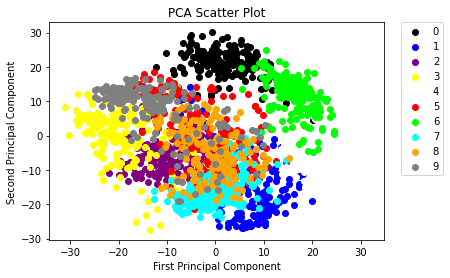

In [11]:
# 因为维度降为二维，所以可以可视化

colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

# 根据主成分分析结果绘制散点图
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])

# 设置图例，0-9用不同颜色表示
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# 设置坐标标签
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
# 设置标题
plt.title("PCA Scatter Plot")

# 显示图形
plt.show()

###  特征选择

特征选择就是选择和任务相关的特征。常有的方法有三种：

- Filter：评价单个特征和任务结果的相关程度，排序留下Top相关的特征部分。常见的过滤方法有：
  
  - Person相关系数
  - 互信息
  - 距离相关度

- Wrapper:将特征选择看作一个特征子集的搜索问题，随选各种特征子集，用来评估不同的特征子集的效果，典型的Wrapper方法有递归特征删除法（Recursive feature elimination）：

 - 1. 首先使用全量特征构建一个模型；
 - 2. 根据相关系数，删除5%-10%的弱特征，观察新模型对比全量模型的变化；
 - 3. 直到删除特征，让模型的性能出现较大的下降；
 
 ```class sklearn.feature_selection.RFE (estimator, n_features_to_select=None, step=1, verbose=0)
 
 ```
  - estimator: 是需要填写的实例化后的评估器;
  - n_features_to_select:是想要选择的特征个数;
  - step表示每次迭代中希望移除的特征个数;


- Embeded:在选定模型的情况下，选出对模型训练最有用的特征，常见的有正则化模型,对应的模型有岭回归，lasso回归。嵌入法是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行。

![image.png](attachment:image.png)

```
  sklearn.feature_selection.SelectFromModel (estimator, threshold=None, prefit=False, norm_order=1,max_features=None)

```

In [40]:
# 例 Filter


from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris=load_iris()
X,y=iris.data,iris.target
print(X.shape)

#选择两个特征
X_new=SelectKBest(chi2,k=2).fit_transform(X,y)
print(X_new.shape)

(150, 4)
(150, 2)


In [44]:
# 例  Wrapper型

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston=load_boston()
X=boston["data"]
Y=boston["target"]
names=boston["feature_names"]

lr=LinearRegression()
rfe=RFE(lr,n_features_to_select=1)#选择剔除1个
rfe.fit(X,Y)

print("features sorted by their rank:")
print(sorted(zip(map(lambda x:round(x,4), rfe.ranking_),names)))


features sorted by their rank:
[(1, 'NOX'), (2, 'RM'), (3, 'CHAS'), (4, 'PTRATIO'), (5, 'DIS'), (6, 'LSTAT'), (7, 'RAD'), (8, 'CRIM'), (9, 'INDUS'), (10, 'ZN'), (11, 'TAX'), (12, 'B'), (13, 'AGE')]


In [48]:
# 例 Embeded 型

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso# 此处以L1正则化的线性模型Lasso为例
from sklearn.datasets import *

X,y=load_boston(return_X_y=True)

print(X.shape)

lasso = Lasso()# 可在此步对模型进行参数设置，这里用默认值。
lasso.fit(X, y)# 训练模型，传入X、y, 数据中不能包含miss_value


model = SelectFromModel(lasso,prefit=True)
X_new = model.transform(X)
print(X_new.shape)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

(506, 13)
(506, 10)
[[6.3200e-03 1.8000e+01 6.5750e+00 6.5200e+01 4.0900e+00 1.0000e+00
  2.9600e+02 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 6.4210e+00 7.8900e+01 4.9671e+00 2.0000e+00
  2.4200e+02 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.1850e+00 6.1100e+01 4.9671e+00 2.0000e+00
  2.4200e+02 1.7800e+01 3.9283e+02 4.0300e+00]
 [3.2370e-02 0.0000e+00 6.9980e+00 4.5800e+01 6.0622e+00 3.0000e+00
  2.2200e+02 1.8700e+01 3.9463e+02 2.9400e+00]
 [6.9050e-02 0.0000e+00 7.1470e+00 5.4200e+01 6.0622e+00 3.0000e+00
  2.2200e+02 1.8700e+01 3.9690e+02 5.3300e+00]]
